## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X_teste, X_treino, y_teste, y_treino = train_test_split(
    X, y, test_size=0.7
)

In [6]:
arvore = DecisionTreeRegressor(max_depth=8)
arvore = arvore.fit(X_treino, y_treino)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [7]:
path = arvore.cost_complexity_pruning_path(X_treino, y_treino)
path

{'ccp_alphas': array([0.00000000e+00, 5.63380282e-05, 1.26760563e-04, 1.26760563e-04,
        4.69483568e-04, 4.69483568e-04, 5.07042254e-04, 5.07042254e-04,
        6.76056338e-04, 9.01408451e-04, 1.24178404e-03, 1.52112676e-03,
        2.02816901e-03, 2.25586854e-03, 2.48356808e-03, 3.16901408e-03,
        3.16901408e-03, 3.24507042e-03, 3.38967136e-03, 3.42253521e-03,
        3.57042254e-03, 3.72676056e-03, 3.94835681e-03, 5.08450704e-03,
        5.42723005e-03, 5.42723005e-03, 6.32253521e-03, 6.32253521e-03,
        6.69657948e-03, 8.28169014e-03, 8.47417840e-03, 9.93427230e-03,
        9.93427230e-03, 1.25093897e-02, 1.30741784e-02, 1.65633803e-02,
        1.72535211e-02, 1.77676056e-02, 1.79049855e-02, 1.79845070e-02,
        1.81417840e-02, 1.92802817e-02, 2.00569640e-02, 2.06211268e-02,
        2.11267606e-02, 2.36760563e-02, 2.44522692e-02, 2.69767606e-02,
        2.77472012e-02, 3.36988082e-02, 3.42760563e-02, 3.49755869e-02,
        3.55352113e-02, 3.64403756e-02, 3.69974178

In [8]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [9]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_treino, y_treino)
    clfs.append(clf)   

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [10]:
from sklearn.metrics import mean_squared_error
train_scores = [mean_squared_error(y_treino, clf.predict(X_treino)) for clf in clfs]
test_scores = [mean_squared_error(y_teste, clf.predict(X_teste)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

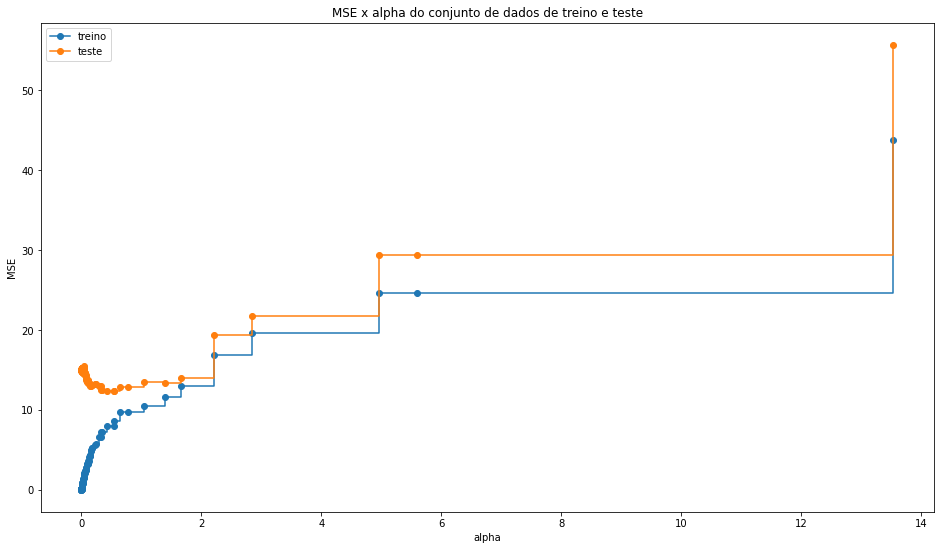

In [13]:
import matplotlib.pyplot as plt

fit, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label='treino', drawstyle='steps-post')
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label='teste', drawstyle='steps-post')
ax.legend()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [14]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=1)
arvore_final.fit(X_treino, y_treino)

print(f'R-quadrado da árvore: {arvore_final.score(X_teste, y_teste):.2f}')

R-quadrado da árvore: 0.86


### 7. Visualize esta árvore.

[Text(0.39137350299401197, 0.9444444444444444, 'LSTAT <= 9.725\nsquared_error = 79.017\nsamples = 355\nvalue = 21.999'),
 Text(0.18937125748502995, 0.8333333333333334, 'RM <= 7.141\nsquared_error = 70.91\nsamples = 147\nvalue = 29.063'),
 Text(0.0845808383233533, 0.7222222222222222, 'DIS <= 1.545\nsquared_error = 35.835\nsamples = 116\nvalue = 26.108'),
 Text(0.07859281437125748, 0.6111111111111112, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.09056886227544911, 0.6111111111111112, 'RM <= 6.543\nsquared_error = 21.229\nsamples = 113\nvalue = 25.473'),
 Text(0.03143712574850299, 0.5, 'TAX <= 222.5\nsquared_error = 7.56\nsamples = 63\nvalue = 22.808'),
 Text(0.011976047904191617, 0.3888888888888889, 'TAX <= 207.5\nsquared_error = 14.062\nsamples = 2\nvalue = 32.45'),
 Text(0.005988023952095809, 0.2777777777777778, 'squared_error = 0.0\nsamples = 1\nvalue = 36.2'),
 Text(0.017964071856287425, 0.2777777777777778, 'squared_error = -0.0\nsamples = 1\nvalue = 28.7'),
 Text(0.050

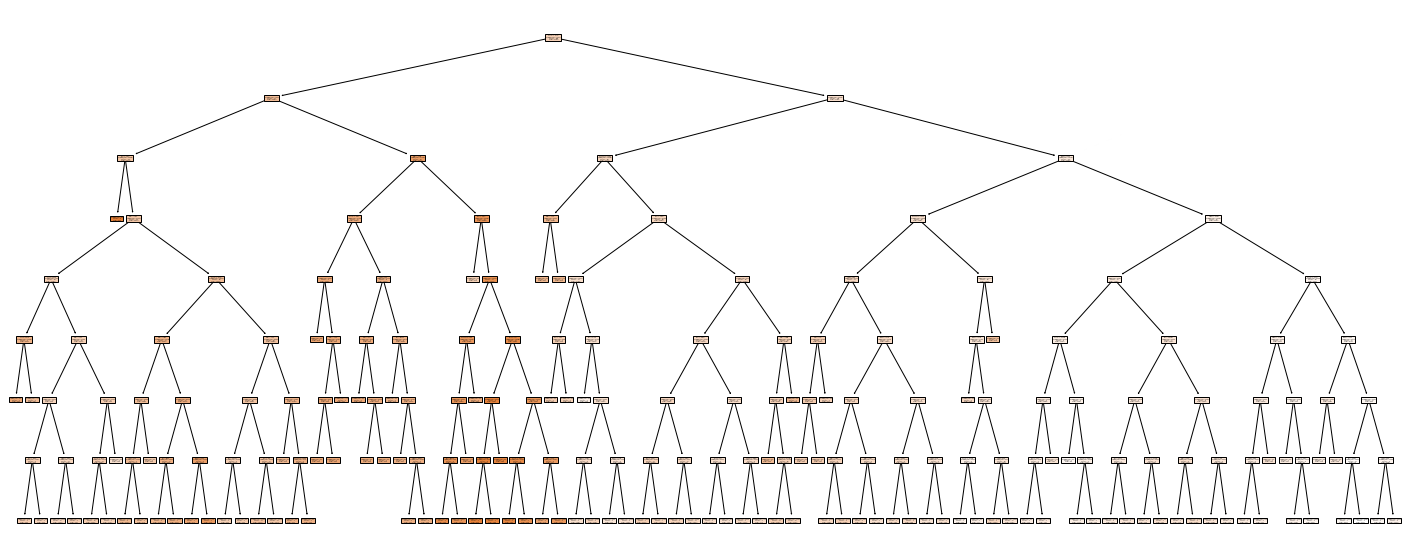

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(arvore, filled=True, feature_names=X.columns)